<a href="https://colab.research.google.com/github/JD32919/EDA/blob/main/Optimizaci%C3%B3n_de_la_Red_de_Abastecimiento_de_Agua_Potable_en_Durango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

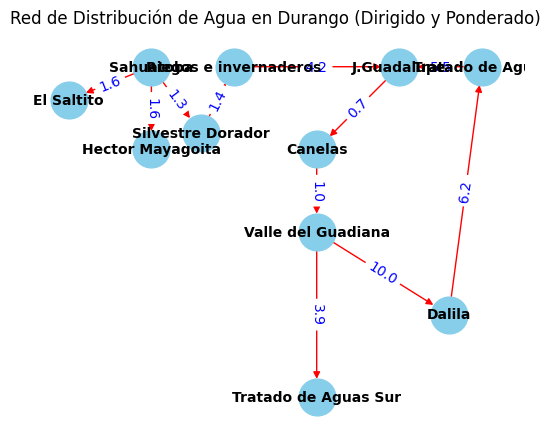

In [ ]:
 import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos (marcadores)
nodos = [
    "Sahuatoba", "El Saltito", "Valle del Guadiana", "Riegos e invernaderos",
    "J.Guadalupe", "Hector Mayagoita", "Silvestre Dorador",
    "Canelas", "Tratado de Aguas", "Dalila", "Tratado de Aguas Sur"
]
G.add_nodes_from(nodos)

# Agregar aristas dirigidas con pesos (distancias en km)
aristas_pesadas = [
    ("Sahuatoba", "El Saltito", 1.6),
    ("Sahuatoba", "Hector Mayagoita", 1.6),
    ("Sahuatoba", "Silvestre Dorador", 1.3),
    ("Silvestre Dorador", "Riegos e invernaderos", 1.4),
    ("Riegos e invernaderos", "J.Guadalupe", 4.2),
    ("J.Guadalupe", "Canelas", 0.7),
    ("Canelas", "Valle del Guadiana", 1.0),
    ("Valle del Guadiana", "Tratado de Aguas Sur", 3.9),
    ("Valle del Guadiana", "Dalila", 10.0),
    ("Dalila", "Tratado de Aguas", 6.2),
    ("Tratado de Aguas", "J.Guadalupe", 5.5)
]

# Agregar las aristas con peso al grafo
for (nodo1, nodo2, peso) in aristas_pesadas:
    G.add_edge(nodo1, nodo2, weight=peso)

# Definir posiciones específicas de los nodos (similares a la imagen)
pos = {
    "Sahuatoba": (-1, 1),
    "El Saltito": (-1.5, 0.8),
    "Valle del Guadiana": (0, 0),
    "Riegos e invernaderos": (-0.5, 1),
    "J.Guadalupe": (0.5, 1),
    "Hector Mayagoita": (-1, 0.5),
    "Silvestre Dorador": (-0.7, 0.6),
    "Canelas": (0, 0.5),
    "Tratado de Aguas": (1, 1),
    "Dalila": (0.8, -0.5),
    "Tratado de Aguas Sur": (0, -1)
}

# Dibujar el grafo con pesos en las aristas
plt.figure(figsize=(5, 4))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="red", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue')
plt.title("Red de Distribución de Agua en Durango (Dirigido y Ponderado)")
plt.show()

# Función para realizar búsqueda secuencial
def busqueda_secuencial(lista, elemento):
    for i, item in enumerate(lista):
        if item.lower() == elemento.lower():
            return i  # Retorna el índice si encuentra el nodo
    return -1  # Retorna -1 si no encuentra el nodo

# Función de búsqueda binaria en una lista ordenada
def busqueda_binaria(lista, elemento):
    lista_ordenada = sorted(lista, key=lambda x: x.lower())  # Ordena ignorando mayúsculas/minúsculas
    inicio, fin = 0, len(lista_ordenada) - 1

    while inicio <= fin:
        medio = (inicio + fin) // 2
        if lista_ordenada[medio].lower() == elemento.lower():
            return medio  # Retorna el índice en la lista ordenada si encuentra el nodo
        elif lista_ordenada[medio].lower() < elemento.lower():
            inicio = medio + 1
        else:
            fin = medio - 1
    return -1  # Retorna -1 si no encuentra el nodo

# Función para encontrar caminos con DFS o BFS
def encontrar_camino(grafo, inicio, fin, metodo="DFS"):
    try:
        if metodo.upper() == "DFS":
            return list(nx.dfs_edges(grafo, source=inicio)) if nx.has_path(grafo, inicio, fin) else None
        elif metodo.upper() == "BFS":
            return list(nx.bfs_edges(grafo, source=inicio)) if nx.has_path(grafo, inicio, fin) else None
        else:
            print("Método no válido. Usa 'DFS' o 'BFS'.")
            return None
    except nx.NodeNotFound:
        print("Uno de los nodos especificados no existe en el grafo.")
        return None

# Función para encontrar la ruta más corta con Dijkstra
def ruta_mas_corta_dijkstra(grafo, inicio, fin):
    try:
        return nx.dijkstra_path(grafo, inicio, fin), nx.dijkstra_path_length(grafo, inicio, fin)
    except nx.NetworkXNoPath:
        return None, float('inf')
    except nx.NodeNotFound:
        print("Uno de los nodos especificados no existe en el grafo.")
        return None, float('inf')

# Solicitar al usuario el nodo para búsqueda secuencial
nodo_secuencial = input("Ingrese el nombre del nodo que desea buscar con búsqueda secuencial: ")
indice_secuencial = busqueda_secuencial(nodos, nodo_secuencial)

# Mostrar el resultado de la búsqueda secuencial
if indice_secuencial != -1:
    print(f"Nodo '{nodo_secuencial}' encontrado en la lista desordenada en el índice {indice_secuencial}.")
else:
    print(f"Nodo '{nodo_secuencial}' no encontrado en la lista de nodos.")

# Solicitar al usuario el nodo para búsqueda binaria
nodo_binario = input("Ingrese el nombre del nodo que desea buscar con búsqueda binaria: ")
indice_binario = busqueda_binaria(nodos, nodo_binario)

# Mostrar el resultado de la búsqueda binaria
if indice_binario != -1:
    print(f"Nodo '{nodo_binario}' encontrado en la lista ordenada.")
else:
    print(f"Nodo '{nodo_binario}' no encontrado en la lista de nodos.")

# Entrada del usuario para búsqueda de caminos con DFS o BFS
nodo_inicio = input("Ingrese el nodo de inicio para encontrar un camino: ")
nodo_fin = input("Ingrese el nodo de destino para encontrar un camino: ")
metodo = input("Ingrese el método de búsqueda ('DFS' o 'BFS'): ")

camino = encontrar_camino(G, nodo_inicio, nodo_fin, metodo)

# Mostrar el camino encontrado
if camino:
    print(f"Camino encontrado usando {metodo}: {camino}")
else:
    print(f"No se encontró un camino entre '{nodo_inicio}' y '{nodo_fin}' usando {metodo}.")

# Solicitar nodos para encontrar la ruta más corta usando Dijkstra
nodo_inicio_dijkstra = input("Ingrese el nodo de inicio para encontrar la ruta más corta: ")
nodo_fin_dijkstra = input("Ingrese el nodo de destino para encontrar la ruta más corta: ")

camino_corto, distancia = ruta_mas_corta_dijkstra(G, nodo_inicio_dijkstra, nodo_fin_dijkstra)

# Mostrar la ruta más corta encontrada
if camino_corto:
    print(f"Ruta más corta encontrada de '{nodo_inicio_dijkstra}' a '{nodo_fin_dijkstra}': {camino_corto} con una distancia total de {distancia} km.")
else:
    print(f"No se encontró una ruta entre '{nodo_inicio_dijkstra}' y '{nodo_fin_dijkstra}'.")

